paper_results_activelearning_abt_buy_attrelbow_density.csv
AUC no bootstrapping: 6116.050000
AUC no bootstrapping warm: 6115.100000
AUC with bootstrapping: 7115.450000
paper_results_activelearning_amazon_google_attrelbow_density.csv
AUC no bootstrapping: 4953.800000
AUC no bootstrapping warm: 4919.450000
AUC with bootstrapping: 6200.950000
paper_results_activelearning_DBPediaAuthors_DnbDataAuthors_attrelbow_density.csv
AUC no bootstrapping: 7929.200000
AUC no bootstrapping warm: 7640.650000
AUC with bootstrapping: 9006.950000
paper_results_activelearning_DBPediaAuthors_VIAFDataAuthors_attrelbow_density.csv
AUC no bootstrapping: 8170.500000
AUC no bootstrapping warm: 8176.800000
AUC with bootstrapping: 9391.350000
paper_results_activelearning_headphones_headphones_catalog_attrelbow_density.csv
AUC no bootstrapping: 8098.350000
AUC no bootstrapping warm: 7571.000000
AUC with bootstrapping: 9254.750000
paper_results_activelearning_phones_phones_catalog_attrelbow_density.csv
AUC no bootstr

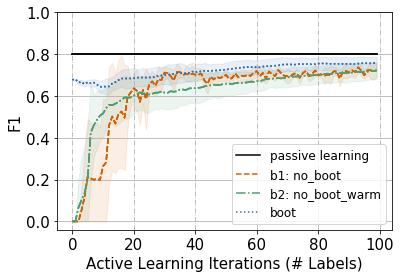

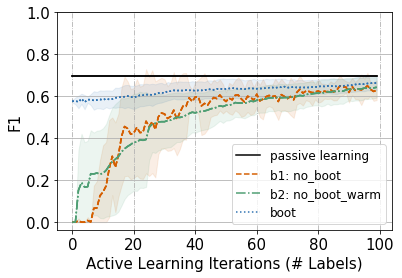

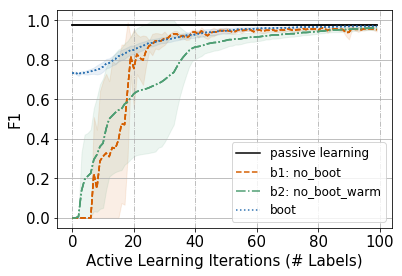

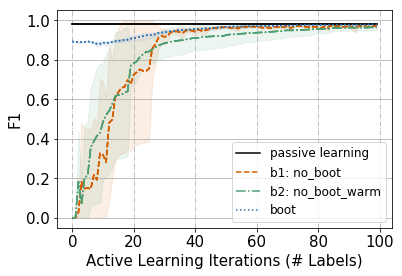

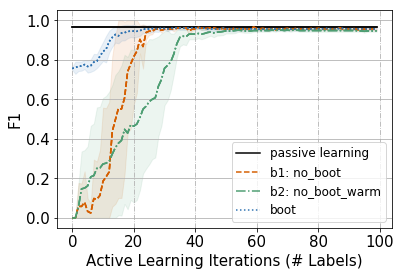

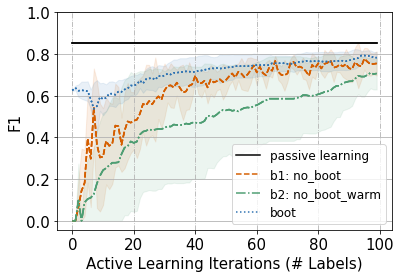

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import csv
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

def errorfill(x, y, yerr, color=None, alpha_fill=0.1, ax=None, linestyle=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
        ind_min = np.where(ymin<0)
        ind_max = np.where(ymax>1)
        ymax[ind_max] = 1.0
        ymin[ind_min] = 0.0
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color, linestyle=linestyle)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)    

filenames=[
         
    '../results/paper_results_activelearning_abt_buy_attrelbow_density.csv',
    '../results/paper_results_activelearning_amazon_google_attrelbow_density.csv',
    '../results/paper_results_activelearning_DBPediaAuthors_DnbDataAuthors_attrelbow_density.csv',
    '../results/paper_results_activelearning_DBPediaAuthors_VIAFDataAuthors_attrelbow_density.csv',
    '../results/paper_results_activelearning_headphones_headphones_catalog_attrelbow_density.csv',
    '../results/paper_results_activelearning_phones_phones_catalog_attrelbow_density.csv'

    ]

query_limit = 100
for filename in filenames: 
    print(filename.split('/')[-1])
    fd = open(filename)
    for i, line in enumerate(fd):
        if i==1:
            no_boot = np.float_([float(i) for i in line.split(',')[1:query_limit+1]])
        if i==2:
            no_boot_std = np.float_([float(i) for i in line.split(',')[1:query_limit+1]])
        if i==3:
            no_boot_warm = np.float_([float(i) for i in line.split(',')[1:query_limit+1]])
        if i==4:
            no_boot_warm_std = np.float_([float(i) for i in line.split(',')[1:query_limit+1]])
        if i==5:
            boot = np.float_([float(i) for i in line.split(',')[1:query_limit+1]])
        if i==6:
            boot_std = np.float_([float(i) for i in line.split(',')[1:query_limit+1]])

    
    name = 'null'
   
    if ('VIAF' in filename):
        passive_learning = [0.981]
        name ='VIAF'
    if ('Dnb' in filename):
        passive_learning = [0.976]
        name ='Dnb'
    if ('amazon_google' in filename):
        passive_learning = [0.699]
        name ='amazon_google'
    if ('abt' in filename):
        passive_learning = [0.802]
        name ='abt'
    if ('itunes_amazon' in filename):
        passive_learning = [0.981]
    if ('_phones' in filename):
        passive_learning = [0.851]
        name ='_phones'
    if ('_headphones' in filename):
        passive_learning = [0.966]
        name ='_headphones'
    
    
    
    passive_learning = passive_learning*len(no_boot)
    no_boot_area = np.trapz(no_boot, dx=len(no_boot))
    boot_area = np.trapz(boot, dx=len(boot))    
    no_boot_warm_area = np.trapz(no_boot_warm, dx=len(no_boot_warm))
    
    print ("AUC no bootstrapping: %f" % no_boot_area)
    print ("AUC no bootstrapping warm: %f" % no_boot_warm_area)
    print ("AUC with bootstrapping: %f" % boot_area)
    

    query_num = np.arange(0,len(no_boot))
    
    fig, ax = plt.subplots()
    
    pas_, =  ax.plot(passive_learning, color="#000000", label="passive learning")
    noboot_, = ax.plot(no_boot, color="#D55E00", label="b1: no_boot", linestyle ='--')
   
    boot_, = ax.plot(boot, color="#2F73B2", label="boot" , linestyle = 'dotted')
    no_boot_warm_, = ax.plot(no_boot_warm, color="#4E9E73", label="b2: no_boot_warm", linestyle='dashdot')
    
    #axins = zoomed_inset_axes(ax, 1, loc=7)
    
    ax.plot(passive_learning, color="#000000")
    
    ax.plot(no_boot, color="#D55E00", linestyle='--')
    errorfill(query_num, no_boot, no_boot_std, color="#D55E00", linestyle ='--')
    ax.plot(boot, color="#2F73B2" , linestyle = 'dotted')
    errorfill(query_num, boot, boot_std, color="#2F73B2", linestyle = 'dotted')
    ax.plot(no_boot_warm, color="#4E9E73", linestyle='dashdot')
    errorfill(query_num, no_boot_warm, no_boot_warm_std, color="#4E9E73", linestyle='dashdot')
    plt.yticks(np.arange(0, 1.2, step=0.2))


    ax.grid(True)
    gridlines = ax.get_xgridlines()
    for line in gridlines:
        line.set_linestyle('-.')
    ax.set_xlabel("Active Learning Iterations (# Labels)", fontsize=15)
    ax.set_ylabel("F1", fontsize=15)
    
    ax.legend(handles=[pas_, noboot_, no_boot_warm_, boot_], fontsize=12)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('%s.pdf' % filename.replace('.csv', '').replace('/results','/results/graphs'), bbox_inches='tight', format='pdf')